## Predicting Malignancy in Biopsied Breast Cells
My task was to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. I used logistic regression as the basis of a binary classifier that ended up being able to predict malignancy with ~96% accuracy.

I started by importing the necessary python modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

I received the data as a .csv ('breast-cancer-wisconsin.csv'). I imported the dataset and loaded it into a pandas DataFrame:

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.csv', na_values = '?', names=('Sample #', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'))

The dataset's missing values were all in the 'Bare Nuclei' attribute column. I replaced those missing values with the mean value from the rest of the column. This lets me use every row of the dataset to train my classifier, but it does introduce another assumption to my model: that those missing bare nuclei data would in fact be close to the mean of the rest of that column.

In [3]:
df.loc[df['Bare Nuclei'].isnull(), 'Bare Nuclei'] = df['Bare Nuclei'].mean()

I was asked to build a binary classifier, so I fit logistic regression model to use as the basis of my classifier. First I prepared my independant variables (predictors) as the 2D array 'X' and my dependant variable (malignancy classification) as the 1D array 'Y':

In [4]:
X = df.as_matrix(columns=df.columns[1:10])
Y = df['Class'].map({2 : 'benign', 4 : 'malignant'})

I fit a logistic regression model to 85% of the data, leaving 15% out to test the model afterwards:

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0, stratify = Y)
model = LogisticRegression()
model = model.fit(X_train, Y_train)

Then I tested the model's performance, using it to generate predicted malignancy classifications for my withheld test data, and comparing those predictions to the true malignancy of those data:

In [6]:
predicted_Y = model.predict(X_test)
print('The resulting model is accurate ' + str(100 * metrics.accuracy_score(Y_test, predicted_Y)) + '% of the time.')

The resulting model is accurate 96.1904761905% of the time.


This logistic regression model seems to be quite accurate (~96% accurate), but this alone is rather opaque. I wanted to know more about how each of the dataset's attributes were being used in the model to produce a classification, so plotted the model's coefficients for each predictor:

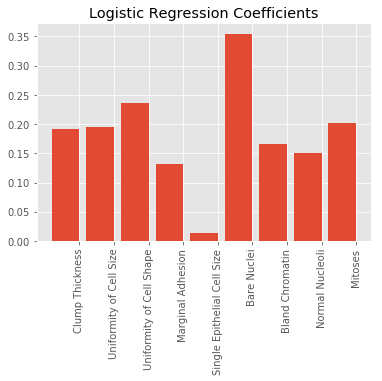

In [7]:
labels = df.columns[1:10].values
xaxis = range(0,len(labels))
%matplotlib inline
plt.style.use('ggplot')
_ = plt.bar((xaxis), np.transpose(model.coef_))
_, lbls = plt.xticks([x+.4 for x in xaxis], labels)
_ = plt.setp(lbls, rotation=90)
_ = plt.title('Logistic Regression Coefficients')

A biopsied breast cell's number of bare nuclei, and its uniformity in shape seems to be the strongest predictor of malignancy (i.e. these attributes have largest coefficients in the model). That being said, for each attribute included in the dataset except for single epithelial cell size, a higher score seems to increase the chance of malignancy. Given more time I would calculate the p-values associated with each coefficient to be able to label their contributions to malignancy as significant or not significant. Additionally, this model could be further evaluated with an ROC analysis.

To use this model for future biopsied breast cell classifications, format new cell data as detailed here: https://archive.ics.uci.edu/ml/datasets/Breast%20Cancer%20Wisconsin%20(Original) into a variable 'attributes' and run the following code:
### malignancy prediction = model.predict(attributes)